# Modelling for Global Health - Data science in Python
## Day 2: Machine learning in Python

On a small dataset we will go through the typical pipeline of a real Machine Learning project: start with statistical summaries and visualization of the data, build multiple different machine learning models, use cross-validation to estimate their accuracies, select the best algorithm, make and evaluate the predictions on a validation set. 
At the end of the session, we might have a look at the other useful functions integrated into scikit-learn

With thanks to Irina Chelysheva

References:
+ Jason Brownlee, Machine Learning Mastery with Python
+ René Laqua, kaggle Python notebook - https://www.kaggle.com/kumargh/pimaindiansdiabetescsv

In [1]:
# Packages for importing, cleaning and looking at the data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Full dataset information:
This dataset describes the medical records for Pima Indians and whether or not each patient will have an onset of diabetes within five (?) years.

## Consists of several medical predictor variables and one target variable (class)
### Attributes:
1. Number of times pregnant
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. Diastolic blood pressure (mm Hg)
4. Triceps skin fold thickness (mm)
5. 2-Hour serum insulin (mu U/ml)
6. Body mass index (weight in kg/(height in m)^2)
7. Diabetes pedigree function
8. Age (years)
9. Class variable (0 or 1)

In [2]:
# Load the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'glu', 'pres', 'skin', 'ins', 'bmi', 'pedi', 'age', 'class']
dataset = pd.read_csv(url, names=names)

In [3]:
#  Discover the dataset
# Shape
print(dataset.shape)
# Head
print(dataset.head(20))
# Descriptions
print(dataset.describe())
# Class distribution
print(dataset.groupby('class').size())

(768, 9)
    preg  glu  pres  skin  ins   bmi   pedi  age  class
0      6  148    72    35    0  33.6  0.627   50      1
1      1   85    66    29    0  26.6  0.351   31      0
2      8  183    64     0    0  23.3  0.672   32      1
3      1   89    66    23   94  28.1  0.167   21      0
4      0  137    40    35  168  43.1  2.288   33      1
5      5  116    74     0    0  25.6  0.201   30      0
6      3   78    50    32   88  31.0  0.248   26      1
7     10  115     0     0    0  35.3  0.134   29      0
8      2  197    70    45  543  30.5  0.158   53      1
9      8  125    96     0    0   0.0  0.232   54      1
10     4  110    92     0    0  37.6  0.191   30      0
11    10  168    74     0    0  38.0  0.537   34      1
12    10  139    80     0    0  27.1  1.441   57      0
13     1  189    60    23  846  30.1  0.398   59      1
14     5  166    72    19  175  25.8  0.587   51      1
15     7  100     0     0    0  30.0  0.484   32      1
16     0  118    84    47  230  45.8  0

In [4]:
# Clean-up the dataset
# Replace zero/invalid values with the mean in the group
# It does not seem to improve the results in this case, might be useful in others
dataset_nozeros = dataset.copy()
zero_fields = ['glu', 'pres', 'skin', 'ins', 'bmi'] 
dataset[zero_fields] = dataset[zero_fields].replace(0, np.nan)
dataset[zero_fields] = dataset[zero_fields].fillna(dataset_nozeros.mean())
print(dataset.describe())  # check that there are no invalid values left

             preg         glu        pres        skin         ins         bmi  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  121.681605   72.254807   26.606479  118.660163   32.450805   
std      3.369578   30.436016   12.115932    9.631241   93.080358    6.875374   
min      0.000000   44.000000   24.000000    7.000000   14.000000   18.200000   
25%      1.000000   99.750000   64.000000   20.536458   79.799479   27.500000   
50%      3.000000  117.000000   72.000000   23.000000   79.799479   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

             pedi         age       class  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%   

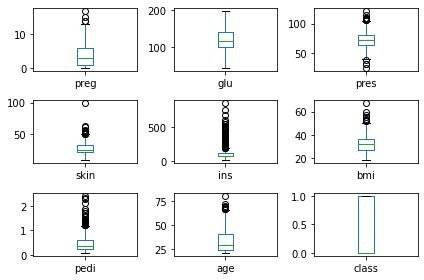

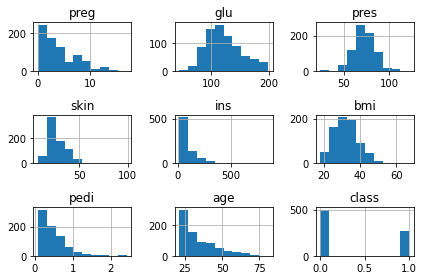

In [5]:
# Visualize the data
# Box plots - gives us a clear idea of the distribution of the input attributes
dataset.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.tight_layout()
plt.show()
# Histograms
dataset.hist()
plt.tight_layout()
plt.show()

In [6]:
# Packages for machine learning usign sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [7]:
# Split-out validation dataset
array = dataset.values
# Separate the last - class column from training/testing data
X = array[:,0:8]
Y = array[:,8]
test_size = 0.25
# Pass an int for reproducible output across multiple function calls
seed = 5
# Split dataset in a stratified fashion
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed,stratify=dataset['class'])

LR: 0.758651 (0.041276)
LDA: 0.784634 (0.030761)
KNN: 0.718905 (0.051517)
CART: 0.685874 (0.037597)
NB: 0.749970 (0.038113)
SVM: 0.651028 (0.005215)


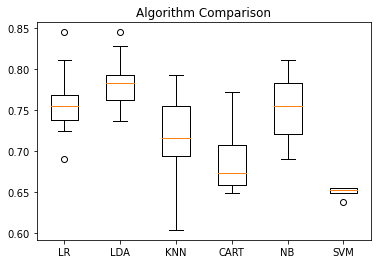

In [8]:
# Build models to check the algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# Evaluate each model
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10) # , random_state=seed
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
# Compare algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

0.7708333333333334
              precision    recall  f1-score   support

         0.0       0.79      0.89      0.83       125
         1.0       0.73      0.55      0.63        67

    accuracy                           0.77       192
   macro avg       0.76      0.72      0.73       192
weighted avg       0.77      0.77      0.76       192

[[111  14]
 [ 30  37]]


<Figure size 432x288 with 0 Axes>

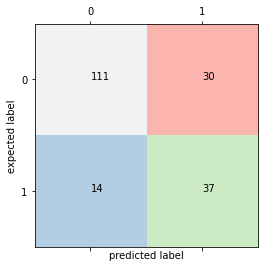

In [9]:
# Use the best model to make predictions and evaluate it
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Make predictions on validation dataset
model = LinearDiscriminantAnalysis()
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

# Evaluate predictions
print(accuracy_score(Y_test, predictions))
print(classification_report(Y_test, predictions))

# Plot confusion matrix
print(confusion_matrix(Y_test, predictions))
conf_matrix = confusion_matrix(Y_test, predictions)
plt.figure()
plt.matshow(conf_matrix, cmap='Pastel1')
for x in range(0, 2):
    for y in range(0, 2):
        plt.text(x, y, conf_matrix[x, y])
        
plt.ylabel('expected label')
plt.xlabel('predicted label')
plt.show()

In [10]:
# Calculate Sensitivity and Specificity
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

print("Sensitivity: %.4f" % (TP / float(TP + FN)))
print("Specificity  : %.4f" % (TN / float(TN + FP)))

# Null accuracy - accuracy to be achieved by always predicting the most frequent class
most_outcome = dataset['class'].median()
prediction_most = [most_outcome for i in range(len(Y_test))]
print(accuracy_score(Y_test, prediction_most))

Sensitivity: 0.5522
Specificity  : 0.8880
0.6510416666666666


In [11]:
# Save the finalized model to disk
import pickle
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))
 
# At some point later...
 
# Load the model back from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

0.7708333333333334


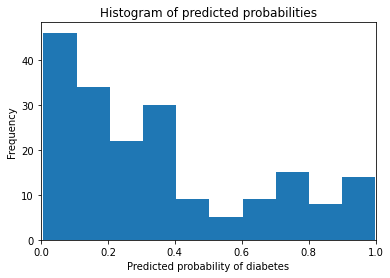

In [12]:
# Improving the model by changing the classification threshold
# Print the first 10 predicted responses
model.predict(X_test)[0:10]
# Print the first 10 predicted probabilities of class membership
model.predict_proba(X_test)[0:10]
# Histogram of predicted probabilities
save_predictions_proba = model.predict_proba(X_test)[:, 1]
plt.hist(save_predictions_proba, bins=10)
plt.xlim(0,1) # x-axis limit from 0 to 1
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')
plt.show()

/Users/jpw/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass threshold=0.35 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


<Figure size 432x288 with 0 Axes>

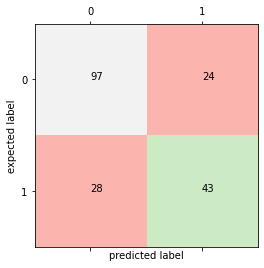

new Sensitivity: 0.6418
new Specificity  : 0.7760


In [13]:
# Change threshold: 
# Predict diabetes if the predicted probability is greater than 0.3
from sklearn.preprocessing import binarize

# Return 1 for all values greater than 0.3, otherwise - 0
prediction2 = binarize(save_predictions_proba.reshape(-1, 1), 0.35)
conf_matrix2 = confusion_matrix(Y_test, prediction2)

plt.figure()
plt.matshow(conf_matrix2, cmap='Pastel1')
for x in range(0, 2):
    for y in range(0, 2):
        plt.text(x, y, conf_matrix2[x, y])
        
plt.ylabel('expected label')
plt.xlabel('predicted label')
plt.show()
TP = conf_matrix2[1, 1]
TN = conf_matrix2[0, 0]
FP = conf_matrix2[0, 1]
FN = conf_matrix2[1, 0]

print("new Sensitivity: %.4f" % (TP / float(TP + FN)))
print("new Specificity  : %.4f" % (TN / float(TN + FP)))

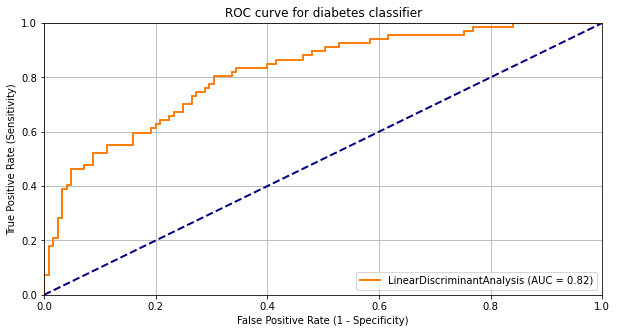

In [15]:
# Plot ROC curve
from sklearn.metrics import roc_curve, auc
# Input: first argument - true values, second argument - predicted probabilities
# Output: FPR, TPR, thresholds
# FPR: False Positive Rate
# TPR: True Positive Rate
FPR, TPR, thresholds = roc_curve(Y_test, save_predictions_proba)

# Plot!
plt.figure(figsize=(10,5))
plt.plot(FPR, TPR)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.plot(FPR, TPR, lw=2, label='LinearDiscriminantAnalysis (AUC = %0.2f)' % auc(FPR, TPR))
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")